# Machine Learning Engineer Nanodegree Capstone Project

## Customer Churn (*) Prediction for Wireless Providers

(*) The churn rate is the percentage of subscribers to a service who discontinue their subscriptions to that service within a given time period. 

"The dataset for this project can be found on the https://courses.cs.ut.ee/MTAT.03.319/2017_fall/uploads/Main/edw_cdr."

This dataset is from the wireless operator's operational data and each row represents a customer’s monthly status for 2015 Jan thru Mar. There are 20468 records for the 9525 unique customers and 29 attributes for each customer such as education, annual income, gender, state and the call drop rates.

Churn Dataset: There are 29 features for each record.
Churn Dataset: There are 20468 records.



Text(0.5,1,'# of Churns in Dataset')

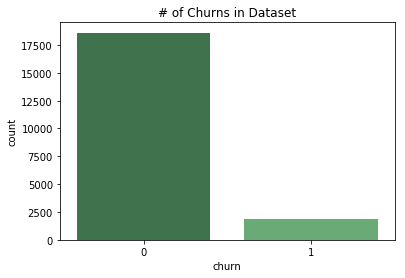

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Pretty display for notebooks
%matplotlib inline

# Importing the dataset "https://courses.cs.ut.ee/MTAT.03.319/2017_fall/uploads/Main/edw_cdr"
churn_data = pd.read_csv('churn.csv')

# print statistics about the dataset
print('Churn Dataset: There are %s features for each record.' % len(churn_data.columns))
print('Churn Dataset: There are %s records.\n' % len(churn_data))
sns.countplot(x="churn",palette="Greens_d", data=churn_data).set_title('# of Churns in Dataset')


### Data Exploration and Cleaning

Exploring the data through statistical description of the dataset. The features 'callingnum', 'year', 'month', 'customerid', 'noadditionallines' will be excluded in the analysis which these features shouldn't affect churn.

In [2]:
# DATA CLEANUP

# Dropping the irrelevant columns:  
#  'callingnum' & 'customerid' column is for customer identification 
#  'year' and 'month' is not related
#  'noadditionallines' is empty

churn_data = churn_data.drop(columns=['callingnum', 'year', 'month', 'customerid', 'noadditionallines'])
features = churn_data.drop(["churn"], axis=1).columns
pd.options.display.float_format = '{:.2f}'.format

# Display a description of the dataset
churn_data.describe(include  = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,20468.00,NaN,NaN,NaN,45.33,19.62,12.00,28.00,45.00,62.00,79.00
annualincome,20468.00,NaN,NaN,NaN,124446.82,72129.39,4.00,61898.00,123689.50,187065.25,249987.00
calldroprate,20468.00,NaN,NaN,NaN,0.04,0.02,0.00,0.01,0.04,0.06,0.07
callfailurerate,20468.00,NaN,NaN,NaN,0.02,0.01,0.00,0.01,0.02,0.03,0.03
customersuspended,20468,2,Yes,20026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,20468,4,High School or below,10217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,20468,2,Female,10474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homeowner,20468,2,Yes,16380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalstatus,20468,2,Single,10446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthlybilledamount,20468.00,NaN,NaN,NaN,59.63,34.65,0.00,29.00,60.00,90.00,119.00


### One Hot Encoding with pandas' get_dummies

The 'churn' data set contains 'object' type data as well as numeric data. We need to encode non numeric data, as in mathematical equations we need to use only numerical values. That is, we will transform non-numerical 'object' type data to numerical labels.

These are the object type columns in this dataset;
customersuspended-education-gender-homeowner-maritalstatus-occupation-state-usesinternetservice-usesvoiceservice

We will use pandas' get_dummies function.

In [3]:
# get_dummies creates dummy/indicator variables (1 or 0)

churn_d2 = pd.get_dummies(churn_data.select_dtypes(['object']))
churn_d3 = churn_data.select_dtypes(exclude = 'object')
churn_numeric = churn_d2.join(churn_d3)

# The feature 'churn' is our label

encoded_features = churn_numeric.columns

encoded_features_nolabel = np.array(churn_numeric.drop(["churn"], axis=1).columns)

print ("\n The new features after encoding:\n")

for i, key in enumerate(encoded_features):
    if (i + 1) % 3:
        print('{:33}'.format(key), end='\t')
    else:
        print(key, end='\n')


 The new features after encoding:

customersuspended_No             	customersuspended_Yes            	education_Bachelor or equivalent
education_High School or below   	education_Master or equivalent   	education_PhD or equivalent
gender_Female                    	gender_Male                      	homeowner_No
homeowner_Yes                    	maritalstatus_Married            	maritalstatus_Single
occupation_Non-technology Related Job	occupation_Others                	occupation_Technology Related Job
state_AK                         	state_AL                         	state_AR
state_AZ                         	state_CA                         	state_CO
state_CT                         	state_DE                         	state_FL
state_GA                         	state_HI                         	state_IA
state_ID                         	state_IL                         	state_IN
state_KS                         	state_KY                         	state_LA
state_MA                     

### Train/Test Split

Split our dataset into training and test sets. We will take a 75:25 randomly sampled split. 

The training set will contain a known label and our model will learn on training data. We will have the test dataset to test our model’s prediction.

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
ch_train, ch_test = train_test_split(churn_numeric, test_size = 0.25, random_state = 0)

#Separate the label 'churn' column from the rest of the train data 
chrn_train = ch_train.loc[:, churn_numeric.columns != 'churn']
chlabel_train = ch_train.loc[:, 'churn']

#Separate the label 'churn' column from the rest of the test data
chrn_test = ch_test.loc[:, churn_numeric.columns != 'churn']
chlabel_test = ch_test.loc[:, 'churn']

print('There are %s total record & %s encoded_feature in the train dataset.'% (chrn_train.shape[0], chrn_train.shape[1] ))
print('There are %s total record & %s encoded_feature in the test dataset.'% (chrn_test.shape[0], chrn_test.shape[1] ))


There are 15351 total record & 83 encoded_feature in the train dataset.
There are 5117 total record & 83 encoded_feature in the test dataset.


### Feature Scaling

Feature scaling to avoid dominance of one independent variable on others. 

In this project I will use StandardScaler method of feature scaling that are implemented in scikit-learn.

The StandardScaler assumes the data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1 when we are comparing measurements that have different units.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$(Xi – mean(X)) / stdev(X)$

StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to reapply the same transformation on the testing set.

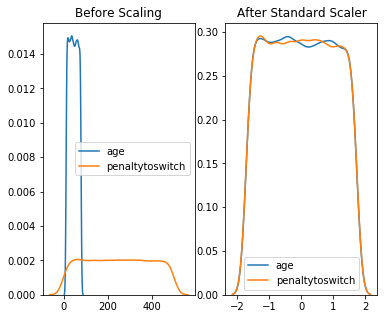

In [5]:
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties

stsc=StandardScaler()

stsc_train = stsc.fit_transform(chrn_train.values)
stsc_test = stsc.transform(chrn_test.values)

churn_trainstsc = pd.DataFrame(stsc_train, index=chrn_train.index, columns=chrn_train.columns)
churn_teststsc = pd.DataFrame(stsc_test, index=chrn_test.index, columns=chrn_test.columns)

# All features are on the same scale relative to one another

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(chrn_train['age'], ax=ax1)
sns.kdeplot(chrn_train['penaltytoswitch'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(churn_trainstsc['age'], ax=ax2)
sns.kdeplot(churn_trainstsc['penaltytoswitch'], ax=ax2)
fontP = FontProperties()
fontP.set_size('small')
plt.show()


# Benchmark Model

I will compare the performance of artificial neural network with Random Forest classifier.
After splitting our dataset and scaling the RandomForest Classifier will be our model; 
Initialise the model, fit it to the dataset, then make the prediction.

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Set up Random Forest Classifier and fit to train dataset
RF = RandomForestClassifier(n_estimators=40)
RF.fit(churn_trainstsc, chlabel_train)

# Make predictions
prediction = RF.predict(churn_teststsc)
print("Predictions: \n" , prediction)

# Probabilities
prob = RF.predict_proba(churn_teststsc)
print ("\n Probabilities: \n" , prob)

# customers' churn probabilities
cust_churn_danger = pd.DataFrame(prob[:,1], index=churn_teststsc.index)
print ("\n Sample customers' churnability probabilities: \n" , cust_churn_danger.tail(3))



Predictions: 
 [0 0 0 ..., 0 0 0]

 Probabilities: 
 [[ 1.     0.   ]
 [ 1.     0.   ]
 [ 1.     0.   ]
 ..., 
 [ 0.775  0.225]
 [ 1.     0.   ]
 [ 0.85   0.15 ]]

 Sample customers' churnability probabilities: 
          0
12665 0.23
15802 0.00
2402  0.15


### Evaluation  "Benchmark Model"

The metrics I will use to evaluate the model;

- "Accuracy" Metric will measure the proportion of the correctly classified instances.
- "Confusion matrix" to describe the performance of a model which is very useful because it will provide the True positive (TP)/False positive (FP)/True negative (TN) and the False negative (FN) values.
- "Recall/Sensitivity": In this churn problem; an important question to ask, when the customer churns, how often does my model predict that correctly?
- "Precision": Another question, when a model predicts the customer will churn, how often does that customer actually churn?
- "F1 score":  It is the weighted average of precision and recall. 


In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import scikitplot as skplt

# ACCURACY
# We can calculate the accuracy from score() function or from the confusion matrix using formula below

cm = confusion_matrix(chlabel_test, prediction)
acc = (cm[0, 0] + cm[1, 1])/(cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]) 

acc_score = RF.score(churn_teststsc, chlabel_test)

print("\n Accuracy_from score: %.4f \n" % acc_score)
print (' Model accuracy from Confusion matrix: %.4f \n' % acc) 


 Accuracy_from score: 0.9500 

 Model accuracy from Confusion matrix: 0.9500 



### Confusion Matrix

Confusion matrix to describe the performance of a model which is very useful because it will provide the True positive (TP)/False positive (FP)/True negative (TN) and the False negative (FN) values.

The x-axis indicates the true class of each observation: 
If a customer churned or not.. 

While the y-axis corresponds to the class predicted by the model:
if the classifier said a customer would churned or not..

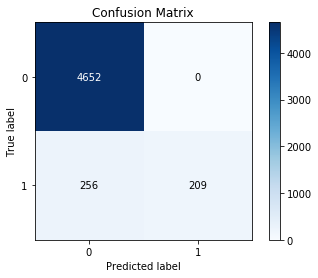

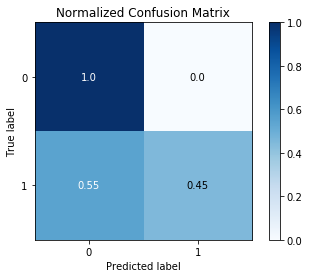

In [14]:
# plot the confusion matrix

skplt.metrics.plot_confusion_matrix(chlabel_test, prediction, normalize=False)
skplt.metrics.plot_confusion_matrix(chlabel_test, prediction, normalize=True)
plt.show()

### Classification Report

Recall/Sensitivity: When the customer churns, how often does my model predict that correctly?

Precision: When a model predicts the customer will churn, how often does that customer actually churn?

F1 score:  It is the weighted average of precision and recall. 


In [15]:
# Display the classification report

target_names = ['NO_Churn', 'Churn']
cr = classification_report(chlabel_test, prediction,target_names=target_names)

print('\n Classification Report: \n\n', cr)


 Classification Report: 

              precision    recall  f1-score   support

   NO_Churn       0.95      1.00      0.97      4652
      Churn       1.00      0.45      0.62       465

avg / total       0.95      0.95      0.94      5117



# Artificial Neural Network

The Number of Hidden Layers & The Number of Neurons in the Hidden Layers:
https://web.archive.org/web/20140721050413/http://www.heatonresearch.com/node/707:

Neural networks with two hidden layers can represent functions with any kind of shape. 
There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, s
uch as the following:
-The number of hidden neurons should be between the size of the input layer and the size of the output layer.
-The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
-The number of hidden neurons should be less than twice the size of the input layer
units = (size of input layer + output layer) /2 = $(83+1)/2 = 42$

Network initialisation (kernel_initializer parameter):
https://cambridgespark.com/content/tutorials/neural-networks-tuning-techniques/index.html

He initialisation: This scheme is a version of the Xavier initialisation more suitable for ReLU activations, 
compensating for the fact that this activation is zero for half of the possible input space. 

L2 regularisation (kernel_regularizer parameter):
https://cambridgespark.com/content/tutorials/neural-networks-tuning-techniques/index.html

There are several other common regularisers that we can apply to our networks. Arguably the most popular out 
of them is L2 regularisation (sometimes also called weight decay), which takes a more direct approach than dropout for regularising. A regulariser, in this sense, aims to decrease complexity of the model while maintaining parameter count the same. L2 regularisation does so by penalising weights with large magnitudes, by minimising their L2 norm, using a hyperparameter λ to specify the relative importance of minimising the norm to minimising the loss on the training set.


In [16]:
# Import Keras libs
import keras

# Initialize the neural network 
from keras.models import Sequential
model = Sequential()

# layer creation
from keras.layers import Dense, Dropout, Activation, BatchNormalization 

from keras.regularizers import l2

# use 0.0001 as a L2-regularisation factor
l2_lambda = 0.0001 


def build_classifier():
    mdl = Sequential()
    mdl.add(Dense(activation= 'relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda), input_dim=83))
    mdl.add(Dense(activation= 'relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda)))
    mdl.add(Dense(activation ='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda)))
    mdl.add(Dense(activation ='sigmoid',units=1, kernel_initializer='he_uniform'))
    
    return mdl

Using TensorFlow backend.



### Optimizer:

http://ruder.io/optimizing-gradient-descent/
http://forums.fast.ai/t/how-do-we-decide-the-optimizer-used-for-training/1829/6

Adam is similar to RMSprop with momentum.  RMSprop contributes the exponentially decaying average of past squared gradients, while momentum accounts for the exponentially decaying average of past gradients. And the Nesterov accelerated gradient (NAG) is superior to vanilla momentum.Nadam (Nesterov-accelerated Adaptive Moment Estimation) thus combines Adam and NAG instead of classical momentum.

In [17]:
# Compile the NN
model = build_classifier()
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting classifier to the Training set
ch_train_array = np.array(churn_trainstsc)
ch_train_label_array = np.array(chlabel_train)

"""
We will use the 'Automatic Verification Dataset' by setting the validation_split argument
Keras will separate a portion (20%) of the training data into a validation dataset and evaluate the 
performance of the model on that validation dataset each epoch
"""

history = model.fit(ch_train_array, ch_train_label_array, batch_size=50, verbose = 1, epochs=100, validation_split = 0.20)
print ("\n Training complete! \n ") 

model.summary()


Train on 12280 samples, validate on 3071 samples
Epoch 1/100
12280/12280 [==============================] - 0s - loss: 0.3525 - acc: 0.8968 - val_loss: 0.3146 - val_acc: 0.9105
Epoch 2/100
12280/12280 [==============================] - 0s - loss: 0.2987 - acc: 0.9086 - val_loss: 0.3021 - val_acc: 0.9105
Epoch 3/100
12280/12280 [==============================] - 0s - loss: 0.2780 - acc: 0.9094 - val_loss: 0.2961 - val_acc: 0.9098
Epoch 4/100
12280/12280 [==============================] - 0s - loss: 0.2591 - acc: 0.9114 - val_loss: 0.2900 - val_acc: 0.9124
Epoch 5/100
12280/12280 [==============================] - 0s - loss: 0.2401 - acc: 0.9199 - val_loss: 0.2843 - val_acc: 0.9137
Epoch 6/100
12280/12280 [==============================] - 0s - loss: 0.2202 - acc: 0.9269 - val_loss: 0.2920 - val_acc: 0.9098
Epoch 7/100
12280/12280 [==============================] - 0s - loss: 0.1983 - acc: 0.9371 - val_loss: 0.2900 - val_acc: 0.9183
Epoch 8/100
12280/12280 [==============================

### k-Fold Cross Validation 

The gold standard for machine learning model evaluation is k-fold cross validation(*).

It provides a robust estimate of the performance of a model on unseen data. It does this by splitting the training dataset into k subsets and takes turns training models on all subsets except one which is held out, and evaluating model performance on the held out validation dataset. The process is repeated until all subsets are given an opportunity to be the held out validation set. The performance measure is then averaged across all models that are created.

* (*) https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

In [20]:
#Manual k-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
seed = 7
X = ch_train_array
Y = ch_train_label_array 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):

    mdlkfold = Sequential()
    mdlkfold.add(Dense(activation='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda), input_dim=83))
    mdlkfold.add(Dense(activation='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda)))
    mdlkfold.add(Dense(activation='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda)))
    mdlkfold.add(Dense(activation='sigmoid',units=1, kernel_initializer='he_uniform'))
    mdlkfold.compile(optimizer = 'nadam', loss='binary_crossentropy', metrics=['accuracy'])
    mdlkfold.fit(X[train], Y[train], batch_size=50, verbose = 0, epochs=100)
    scores = mdlkfold.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (mdlkfold.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

# The average and standard deviation of the model performance    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 97.14%
acc: 94.86%
acc: 96.29%
acc: 96.42%
acc: 93.36%
acc: 96.03%
acc: 97.13%
acc: 94.07%
acc: 95.96%
acc: 97.20%
95.84% (+/- 1.27%)


### Tuning the ANN
The  "NADAM" optimizer has been selected for this project based on "Tuning the ANN" part of this code. 
best parameters: {'epochs': 100, 'optimizer': 'nadam', 'batch_size': 50} out of parameters = {'batch_size': [25,50], 'epochs': [100,200], 'optimizer': ['nadam','adam','rmsprop']}. 
The parameter tuning took ~10 hours (*)
** The tuning result printout summarized below

In [ ]:
from sklearn.model_selection import GridSearchCV

def opt_classifier(optimizer):
    mdlopt = Sequential()
    mdlopt.add(Dense(activation='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda), input_dim=83))
    mdlopt.add(Dense(activation='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda)))
    mdlopt.add(Dense(activation='relu',units=42, kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda)))
    mdlopt.add(Dense(activation='sigmoid',units=1, kernel_initializer='he_uniform'))
    mdlopt.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return mdlopt


mdlopt = KerasClassifier(build_fn = opt_classifier)

parameters = {'batch_size': [25,50], 'epochs': [100,200], 'optimizer': ['nadam','adam','rmsprop']}

grid_search = GridSearchCV(estimator = mdlopt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(np.array(churn_trainstsc), chlabel_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print ('\n', best_parameters)
print ('\n', best_accuracy)




Epoch 1/100
13815/13815 [==============================] - 2s - loss: 0.3288 - acc: 0.9087     
Epoch 2/100
13815/13815 [==============================] - 1s - loss: 0.2939 - acc: 0.9096     
Epoch 3/100
13815/13815 [==============================] - 1s - loss: 0.2731 - acc: 0.9121     
Epoch 4/100
13815/13815 [==============================] - 0s - loss: 0.2539 - acc: 0.9164     
Epoch 5/100
13815/13815 [==============================] 

...............

Epoch 95/100
15351/15351 [==============================] - 1s - loss: 0.0385 - acc: 1.0000     
Epoch 96/100
15351/15351 [==============================] - 1s - loss: 0.0375 - acc: 1.0000     
Epoch 97/100
15351/15351 [==============================] - 1s - loss: 0.0364 - acc: 1.0000     
Epoch 98/100
15351/15351 [==============================] - 1s - loss: 0.0353 - acc: 1.0000     
Epoch 99/100
15351/15351 [==============================] - 1s - loss: 0.0342 - acc: 1.0000     
Epoch 100/100
15351/15351 [==============================] - 1s - loss: 0.0345 - acc: 0.9996     

 {'epochs': 100, 'optimizer': 'nadam', 'batch_size': 50}

 0.959546609341

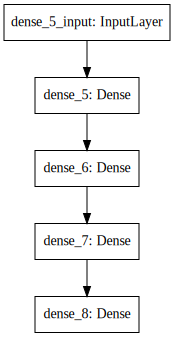

In [160]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [18]:
# Save the model to a file for later use
from keras.models import load_model
model.save('ANN_churn_model.hdf5')


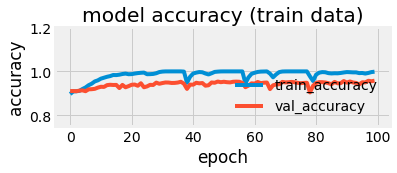

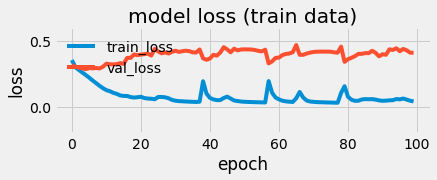

In [19]:
# Plot the training/validation history of our Keras model

plt.figure(1)
plt.style.use('fivethirtyeight')

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])
plt.title('model accuracy (train data)')
plt.ylim([0.75, 1.2])
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train_accuracy', 'val_accuracy'], loc='lower right', frameon=False)  
plt.show()

# summarize history for loss  
  
plt.subplot(212)
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss (train data)')  
plt.ylim([-0.2, 0.6])
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_loss', 'val_loss'], loc='upper left', frameon=False)  
plt.show()  

In [13]:
# Generating the churn label predictions based on the churn_test set

# Predicts a value between 0 and 1
chlabel_predx = model.predict(np.array(churn_teststsc))

#  Filter the values based on a threshold
chlabel_pred = (chlabel_predx >= 0.5)   

print ('\n \n  First 10 prediction probabilities \n', chlabel_predx[0:10])
print ('\n First 10 predictions \n ', chlabel_pred[:10])
print ('\n Prediction for the test set complete!') 


prob2 = model.predict_proba(np.array(churn_teststsc))

print ("\n Probabilities: \n" , prob2)
index=churn_teststsc.index

# customers' churn probabilities
cust_churn_danger_ann = pd.DataFrame(prob2, index=index)

cust_churn_danger_ann_sort=cust_churn_danger_ann.sort_values(by=[0], ascending=False)
#print ("\n Sample customers' churnability probabilities: \n" , cust_churn_danger_ann_sort)



 
  First 10 prediction probabilities 
 [[  4.50439785e-07]
 [  3.33641452e-08]
 [  3.77696961e-05]
 [  9.84913766e-01]
 [  9.99986410e-01]
 [  4.89680367e-08]
 [  6.66856164e-14]
 [  8.95218477e-09]
 [  6.64020774e-07]
 [  9.30253776e-08]]

 First 10 predictions 
  [[False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]]

 Prediction for the test set complete!
2752/5117 [===============>..............] - ETA: 0s
 Probabilities: 
 [[  4.50439785e-07]
 [  3.33641452e-08]
 [  3.77696961e-05]
 ..., 
 [  9.97022808e-01]
 [  1.93031738e-05]
 [  3.90745961e-04]]


### Evaluation  "Neural Network"

The metrics I will use to evaluate the model;

- "Accuracy" Metric will measure the proportion of the correctly classified instances.
- "Confusion matrix" to describe the performance of a model which is very useful because it will provide the True positive (TP)/False positive (FP)/True negative (TN) and the False negative (FN) values.
- "Recall/Sensitivity": In this churn problem; an important question to ask, when the customer churns, how often does my model predict that correctly?
- "Precision": Another question, when a model predicts the customer will churn, how often does that customer actually churn?
- "F1 score":  It is the weighted average of precision and recall. 

In [19]:
# ACCURACY
#To compute the mean values of accuracy metric for each batch based on the churn_test 

score_ann = model.evaluate(np.array(churn_teststsc), chlabel_test, verbose=0)
metrics_ann = model.metrics_names

print('Test %s  : %.4f' % (metrics_ann[1]  , score_ann[1]))

Test acc  : 0.9531


### Confusion Matrix & Classification Report

Confusion matrix will provide the TP/FP/TN/FN values.

The x-axis: If a customer churned or not.. 
The y-axis: If the classifier said a customer would churned or not..

Classification Report will provide;

Recall/Sensitivity: When the customer churns, how often does my model predict that correctly?
Precision: When a model predicts the customer will churn, how often does that customer actually churn?
F1 score:  It is the weighted average of precision and recall.

In [21]:
# create Confusion Matrix & Classification report

target_names = ['NO_Churn', 'Churn']

#Confusion Matrix
cm_ann = confusion_matrix(chlabel_test, chlabel_pred) 

#Classification Report
cr_ann = classification_report(chlabel_test, chlabel_pred,target_names=target_names)

print('\n Classification Report: \n\n', cr_ann)



 Classification Report: 

              precision    recall  f1-score   support

   NO_Churn       0.97      0.98      0.97      4652
      Churn       0.77      0.69      0.73       465

avg / total       0.95      0.95      0.95      5117



In [22]:
# ACCURACY
#To compute the mean values of accuracy metric for each batch based on the churn_test 

score_ann = model.evaluate(np.array(churn_teststsc), chlabel_test, verbose=0)

print('Model accuracy : %.4f' %  score_ann[1])
#acc_ann = (cm_ann[0, 0] + cm_ann[1, 1])/(cm_ann[0, 0] + cm_ann[0, 1] + cm_ann[1, 0] + cm_ann[1, 1])
#print ('\nModel accuracy: %.4f'  % acc_ann) 

Model accuracy : 0.9531


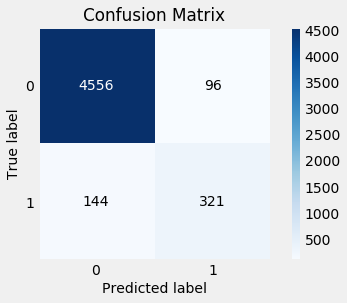

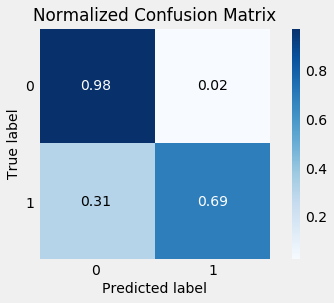

In [23]:
# plot the confusion matrix

skplt.metrics.plot_confusion_matrix(chlabel_test, chlabel_pred, normalize=False)
skplt.metrics.plot_confusion_matrix(chlabel_test, chlabel_pred, normalize=True)
plt.show()

### Feature Importance

We can plot feature importance to see which features were most useful in our model.

http://blog.datadive.net/selecting-good-features-part-iii-random-forests/

Thus when training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.

*There are a few things to keep in mind when using the impurity based ranking. Firstly, feature selection based on impurity reduction is biased towards preferring variables with more categories (see Bias in random forest variable importance measures). Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features. But when interpreting the data, it can lead to the incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the response variable.


,feat_importance,labels
69,0.08,age
79,0.07,unpaidbalance
70,0.07,annualincome
78,0.06,totalminsusedinlastmonth
73,0.06,monthlybilledamount
77,0.06,penaltytoswitch
76,0.06,numdayscontractequipmentplanexpiring
80,0.06,percentagecalloutsidenetwork
82,0.04,avgcallduration
81,0.04,totalcallduration


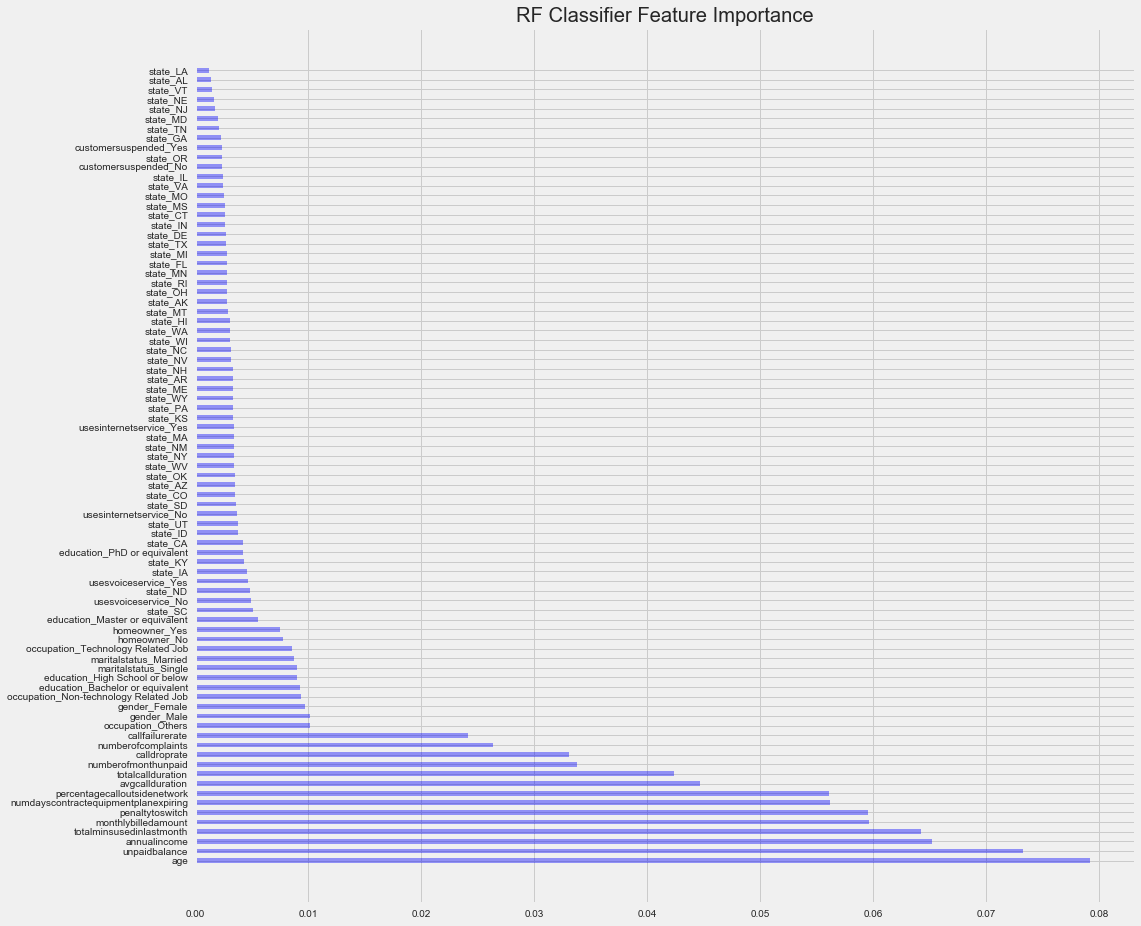

In [225]:
# Random Forest Model_feature Importance

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

churn_feat = pd.DataFrame(RF.feature_importances_, columns=["feat_importance"])
churn_feat["labels"] = encoded_features_nolabel

churn_feat.sort_values("feat_importance", inplace=True, ascending=False)
display(churn_feat.head(10))

# Plot the feature importance for all features

bar_width=0.5
index = np.arange(len(RF.feature_importances_))
rects = plt.barh(index , churn_feat["feat_importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, churn_feat["labels"])
plt.title('RF Classifier Feature Importance')  
plt.show()



In [226]:
# These customers are our top 10 contenders close to churn based on our model's probability results
cust_churn_danger.sort_values([0], inplace=True, ascending=False)
display(cust_churn_danger.head(10))



,0
14655,0.90
1479,0.82
13794,0.80
9610,0.78
19260,0.78
14022,0.75
16841,0.75
1124,0.75
10478,0.75
8157,0.75
